In [406]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [407]:
#Read data from file
filename = 'listings.csv'
df = pd.read_csv(filename)

In [408]:
df.shape

(15854, 75)

In [409]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,27934.0,https://www.airbnb.com/rooms/27934,2.020000e+13,12/28/2022,city scrape,Nice room with superb city view,Our cool and comfortable one bedroom apartment...,It is very center of Bangkok and easy access t...,https://a0.muscache.com/pictures/566374/23157b...,120437,...,4.91,4.66,4.75,NaN,f,2,2,0,0,0.50
1,941865.0,https://www.airbnb.com/rooms/941865,2.020000e+13,12/28/2022,city scrape,Suite Room 3 at MetroPoint,<b>The space</b><br />MetroPoint Bangkok Hotel...,NaN,https://a0.muscache.com/pictures/13930311/1a1c...,610315,...,NaN,NaN,NaN,NaN,f,3,0,3,0,NaN
2,27979.0,https://www.airbnb.com/rooms/27979,2.020000e+13,12/28/2022,city scrape,"Easy going landlord,easy place","<b>The space</b><br />""The village Condominium...",NaN,https://a0.muscache.com/pictures/106247594/1d6...,120541,...,NaN,NaN,NaN,NaN,f,2,1,1,0,NaN
3,28745.0,https://www.airbnb.com/rooms/28745,2.020000e+13,12/28/2022,city scrape,modern-style apartment in Bangkok,A modern-style apartment situated in a cool ne...,Ramkumheang neigbourhood - hip place with food...,https://a0.muscache.com/pictures/160369/92a7ec...,123784,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
4,35780.0,https://www.airbnb.com/rooms/35780,2.020000e+13,12/28/2022,city scrape,Spacious one bedroom at The Kris Condo Bldg. 3,Cozy and clean apartment at MRT Sutthisarn sta...,"There is McDonald's, Au bon Pain and Max Value...",https://a0.muscache.com/pictures/89302e4b-b529...,153730,...,4.50,4.50,5.00,NaN,f,1,0,1,0,0.03


In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15854 non-null  float64
 1   listing_url                                   15854 non-null  object 
 2   scrape_id                                     15854 non-null  float64
 3   last_scraped                                  15854 non-null  object 
 4   source                                        15854 non-null  object 
 5   name                                          15846 non-null  object 
 6   description                                   15248 non-null  object 
 7   neighborhood_overview                         8375 non-null   object 
 8   picture_url                                   15854 non-null  object 
 9   host_id                                       15854 non-null 

In [411]:
data = df.copy()
data = data[['property_type','room_type','amenities','accommodates','bathrooms_text','bedrooms','beds','neighbourhood_cleansed','first_review','host_has_profile_pic','host_identity_verified','host_response_rate','host_since','instant_bookable','last_review','latitude','longitude','name','number_of_reviews','review_scores_rating','price']]

In [412]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_type           15854 non-null  object 
 1   room_type               15854 non-null  object 
 2   amenities               15854 non-null  object 
 3   accommodates            15854 non-null  int64  
 4   bathrooms_text          15752 non-null  object 
 5   bedrooms                14466 non-null  float64
 6   beds                    15509 non-null  float64
 7   neighbourhood_cleansed  15854 non-null  object 
 8   first_review            10064 non-null  object 
 9   host_has_profile_pic    15854 non-null  object 
 10  host_identity_verified  15854 non-null  object 
 11  host_response_rate      12917 non-null  object 
 12  host_since              15854 non-null  object 
 13  instant_bookable        15854 non-null  object 
 14  last_review             10064 non-null

#### property_type

In [413]:
## property_type ##

print(' null count = ', data['property_type'].isna().sum())

 null count =  0


In [414]:
print(data['property_type'].value_counts())

Entire condo                   3771
Entire rental unit             3769
Private room in rental unit    1601
Private room in condo           876
Room in hotel                   695
                               ... 
Private room in tipi              1
Shared room in loft               1
Private room in farm stay         1
Treehouse                         1
Shipping container                1
Name: property_type, Length: 85, dtype: int64


In [415]:
property_categories = ['Entire','Shared', 'Privete', 'Room']
entire = 'Entire'
shared = 'Shared'
private = 'Private'
room = 'Room'

conditions = [ (data['property_type'].str.contains(entire)),
                (data['property_type'].str.contains(shared)),
                (data['property_type'].str.contains(private)),
                (data['property_type'].str.contains(room))]

data['property_cate'] = np.select(conditions,property_categories, default='Other')

data['property_cate'].value_counts(ascending = True)

Other        39
Shared      523
Room       1726
Privete    4748
Entire     8818
Name: property_cate, dtype: int64

#### room_type

In [416]:
print('null count = ', data['room_type'].isna().sum())

null count =  0


In [417]:
data['room_type'].value_counts()

Entire home/apt    8912
Private room       5770
Hotel room          649
Shared room         523
Name: room_type, dtype: int64

In [418]:
data[['property_cate','room_type']].head(10) # drop property

,property_cate,room_type
0,Entire,Entire home/apt
1,Privete,Private room
2,Privete,Private room
3,Privete,Private room
4,Privete,Private room
5,Privete,Private room
6,Privete,Private room
7,Entire,Entire home/apt
8,Privete,Private room
9,Privete,Private room


#### amenities

In [419]:
data['amenities']

0        ["Shampoo", "Kitchen", "Fire extinguisher", "F...
1        ["Washer", "Air conditioning", "Breakfast", "K...
2        ["Pool", "Washer", "First aid kit", "Heating",...
3                              ["Long term stays allowed"]
4        ["Clothing storage: closet and dresser", "Blen...
                               ...                        
15849    ["Paid parking on premises", "Shampoo", "Kitch...
15850    ["Building staff", "Shampoo", "Bidet", "Kitche...
15851    ["Paid parking on premises", "Shampoo", "Kitch...
15852    ["Kitchen", "Lockbox", "Drying rack for clothi...
15853    ["Paid parking on premises", "Shampoo", "Kitch...
Name: amenities, Length: 15854, dtype: object

In [420]:
# amenities : str
data['amenities'] = data['amenities'].str.replace('[' , '', regex=True)
data['amenities'] = data['amenities'].str.replace(']' , '', regex=True)
data['amenities'] = data['amenities'].str.replace('"' , '', regex=True)
amenities_list = [ [ word for word in row.split(',') ] for row in data['amenities'] ]

cols = set( word for row in amenities_list for word in row)
cols.remove('')
print('number of list in amenities_list =', len(amenities_list))
print('number of amenities =', len(cols))

number of list in amenities_list = 15854
number of amenities = 1640


In [421]:
# amenities_df = pd.DataFrame(columns= list(cols))
# for row_idx in range(len(amenities_list)):
#     for col in cols:
#         amenities_df.loc[row_idx,col] = int((lambda x : x in amenities_list[row_idx])(col))


# amenities_df

#### accommodates

In [422]:
print('null count = ', data['accommodates'].isna().sum())

null count =  0


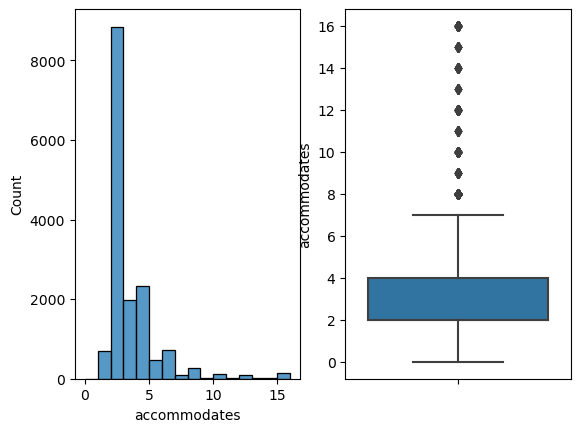

In [423]:
plt.subplot(1,2,1)
sns.histplot(data=data, x='accommodates', binwidth = 1)

plt.subplot(1,2,2)
sns.boxplot(data=data, y='accommodates')
plt.show()

#### bathrooms_text

In [424]:
print('null count = ', data['bathrooms_text'].isna().sum())
data['bathrooms_text'] = data['bathrooms_text'].str.lower()
print(data['bathrooms_text'])

null count =  102
0             1.5 baths
1                1 bath
2                1 bath
3                1 bath
4        1 private bath
              ...      
15849            1 bath
15850    1 private bath
15851            1 bath
15852            1 bath
15853            1 bath
Name: bathrooms_text, Length: 15854, dtype: object


In [425]:
def drop_by_theshold(data,column) :
    theshold_drop = 0.05 * len(df)
    if data[column].isna().sum() <= theshold_drop :
        null = data[column].isna()
        data = data[~null]
        print('null count after drop NaN = ', data[column].isna().sum())
    else : print('null > 5% of data; can\'t drop ')
    return data
        
data = drop_by_theshold(data,'bathrooms_text')

null count after drop NaN =  0


In [426]:
bath_new = list()   # some bathrooms_text don't start with number 0-9
for row in data['bathrooms_text'] :
    if row[0] not in '0123456789' :
        row = '1 ' + row
        bath_new.append(row)
    else : bath_new.append(row)

bath_df = pd.DataFrame(bath_new, columns = ['bath_new'])
data = pd.concat([data, bath_df], axis = 1)

data['bath_new']

0             1.5 baths
1                1 bath
2                1 bath
3                1 bath
4        1 private bath
              ...      
12496          14 baths
12564    1 private bath
12613            1 bath
12679    1 private bath
14390    3 shared baths
Name: bath_new, Length: 15854, dtype: object

In [427]:
data[['bath_size', 'bath_type']] = data['bath_new'].str.split(' ', 1, expand = True)
data[['bath_size', 'bath_type']]

C:\Users\song-\AppData\Local\Temp\ipykernel_4592\3232321752.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  data[['bath_size', 'bath_type']] = data['bath_new'].str.split(' ', 1, expand = True)


,bath_size,bath_type
0,1.5,baths
1,1,bath
2,1,bath
3,1,bath
4,1,private bath
...,...,...
12496,14,baths
12564,1,private bath
12613,1,bath
12679,1,private bath


In [428]:
data['bath_type'].value_counts()

bath                 7326
baths                3498
private bath         3347
shared baths          930
shared bath           595
half-bath              25
shared half-bath       24
private half-bath       7
Name: bath_type, dtype: int64

In [429]:
data['bath_type'] = data['bath_type'].replace(['baths','shared baths','Shared half-bath','Private half-bath'],
                                              ['bath','shared bath','Half-bath','Half-bath'])
data['bath_type'].value_counts()

bath                 10824
private bath          3347
shared bath           1525
half-bath               25
shared half-bath        24
private half-bath        7
Name: bath_type, dtype: int64

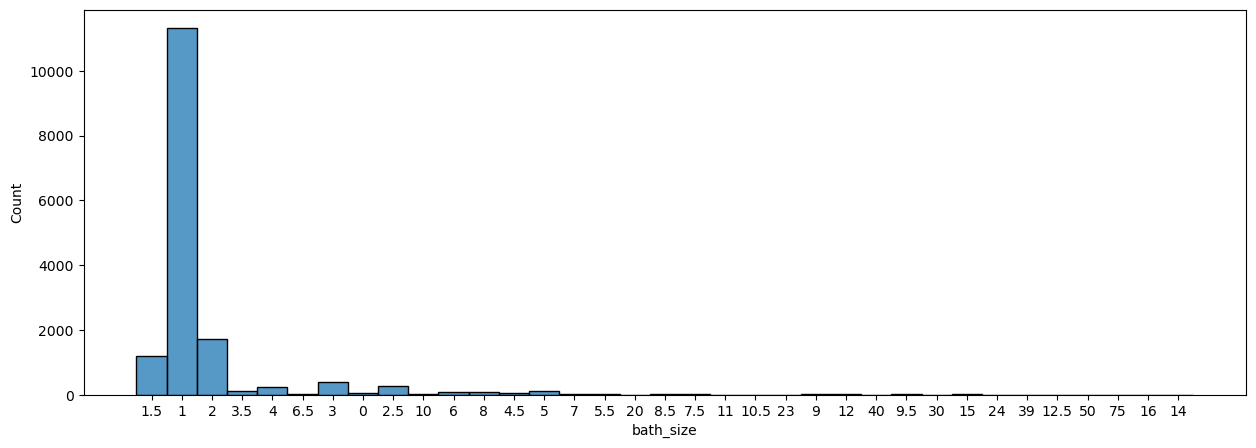

In [430]:
plt.figure(figsize=(15,5))
sns.histplot(data=data, x = 'bath_size')
plt.show()

#### bedrooms

In [431]:
print('null count = ', data['bedrooms'].isna().sum())
print(data['bedrooms'])

null count =  1482
0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
12496    NaN
12564    NaN
12613    NaN
12679    NaN
14390    NaN
Name: bedrooms, Length: 15854, dtype: float64


In [432]:
data = drop_by_theshold(data,'bedrooms')

null > 5% of data; can't drop 


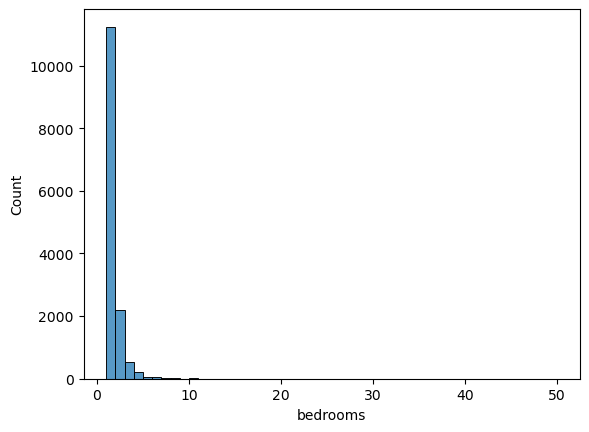

In [433]:
sns.histplot(data=data, x='bedrooms', bins = 100, binwidth = 1)
plt.show()

In [434]:
data['bedrooms'] = data['bedrooms'].fillna(data['bedrooms'].median())
# print('null count = ', data['bedrooms'].isna().sum())
# sns.histplot(data=data, x='bedrooms', bins = 100, binwidth = 1)
# plt.show()

#### beds

In [435]:
print('null count = ', data['beds'].isna().sum())
print(data['beds'])
print('---------------------------')
data = drop_by_theshold(data,'beds')

null count =  432
0        1.0
1        1.0
2        2.0
3        1.0
4        1.0
        ... 
12496    NaN
12564    NaN
12613    NaN
12679    NaN
14390    NaN
Name: beds, Length: 15854, dtype: float64
---------------------------
null count after drop NaN =  0


#### neighbourhood_cleansed

In [436]:
print('null count = ', data['neighbourhood_cleansed'].isna().sum())
print(data['neighbourhood_cleansed'])

null count =  0
0        Ratchathewi
1          Bang Kapi
2            Bang Na
3          Bang Kapi
4          Din Daeng
            ...     
15849    Ratchathewi
15850     Chatu Chak
15851    Ratchathewi
15852     Bang Phlat
15853    Khlong Toei
Name: neighbourhood_cleansed, Length: 15422, dtype: object


In [437]:
data['neighbourhood_cleansed'] = data['neighbourhood_cleansed'].str.lower()
data['neighbourhood_cleansed'].nunique()

50

In [438]:
data['neighbourhood_cleansed'].value_counts()

vadhana                 2106
khlong toei             2057
huai khwang             1091
ratchathewi             1084
bang rak                 817
sathon                   792
phra nakhon              602
phra khanong             546
chatu chak               530
parthum wan              442
bang na                  433
din daeng                428
phaya thai               412
suanluang                372
khlong san               341
bang kapi                246
bang sue                 244
bang phlat               209
yan na wa                196
thon buri                177
don mueang               161
phasi charoen            151
bangkok noi              151
pra wet                  149
lat krabang              142
bang kho laen            139
lak si                   122
pom prap sattru phai     121
bang khen                111
samphanthawong           109
wang thong lang           89
dusit                     88
bang khae                 86
bangkok yai               83
chom thong    